# Import libraries and Load data

In [1]:
import pandas as pd
import Wrangling_functions as f1
import Networkx_function as f3
%matplotlib inline

In [2]:
# Load data
origin_df = pd.read_csv('./stack-overflow-developer-survey-2022/survey_results_public.csv')

In [3]:
# Select columns
df = origin_df[['MainBranch','DevType','LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith',
                'ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith']]
# Rename columns
df.rename(columns={'LanguageHaveWorkedWith':'Language',
                   'DatabaseHaveWorkedWith':'Database',
                   'PlatformHaveWorkedWith':'Cloud Platform',
                   'WebframeHaveWorkedWith':'Web Framework',
                   'ToolsTechHaveWorkedWith':'Container Tool',
                   'NEWCollabToolsHaveWorkedWith':'IDE'}, inplace=True)
# Drop rows whose all data is missing or contain null values(NaN)
df = df.dropna(how='all')

df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_10572\2928913508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'LanguageHaveWorkedWith':'Language',


,MainBranch,DevType,Language,Database,Cloud Platform,Web Framework,Container Tool,IDE
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,NaN,JavaScript;TypeScript,NaN,NaN,NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...",Data scientist or machine learning specialist;...,C#;C++;HTML/CSS;JavaScript;Python,Microsoft SQL Server,NaN,Angular.js,NaN,Notepad++;Visual Studio
3,I am a developer by profession,"Developer, full-stack",C#;JavaScript;SQL;TypeScript,Microsoft SQL Server,NaN,ASP.NET;ASP.NET Core,NaN,Notepad++;Visual Studio;Visual Studio Code
4,I am a developer by profession,"Developer, front-end;Developer, full-stack;Dev...",C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Firebase;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;jQuery;Node.js,npm,Notepad++;Visual Studio;Visual Studio Code;Xcode


# FIlter data

In [9]:
# Only analyze respondents who are either a developer by profession or
# not primarily a developer but write code sometimes as part of their work

filter_df = df[(df['MainBranch']=='I am a developer by profession') | 
               (df['MainBranch']=='I am not primarily a developer, but I write code sometimes as part of my work')]
filter_df.head()

,MainBranch,DevType,Language,Database,Cloud Platform,Web Framework,Container Tool,IDE
1,I am a developer by profession,NaN,JavaScript;TypeScript,NaN,NaN,NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...",Data scientist or machine learning specialist;...,C#;C++;HTML/CSS;JavaScript;Python,Microsoft SQL Server,NaN,Angular.js,NaN,Notepad++;Visual Studio
3,I am a developer by profession,"Developer, full-stack",C#;JavaScript;SQL;TypeScript,Microsoft SQL Server,NaN,ASP.NET;ASP.NET Core,NaN,Notepad++;Visual Studio;Visual Studio Code
4,I am a developer by profession,"Developer, front-end;Developer, full-stack;Dev...",C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Firebase;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;jQuery;Node.js,npm,Notepad++;Visual Studio;Visual Studio Code;Xcode
5,"I am not primarily a developer, but I write co...",NaN,C++;Lua,NaN,NaN,NaN,Homebrew,Visual Studio Code;Xcode


In [10]:
# Categorize DevType column into job groups
Dev = ['Developer, back-end','Developer, desktop or enterprise applications','Developer, embedded applications or devices',
       'Developer, front-end','Developer, full-stack','Developer, game or graphics','Developer, mobile',
       'Developer, QA or test']
SysAdmin_DevOps = ['System administrator','DevOps specialist']
Security = ['Security professional']
Blockchain = ['Blockchain']
Cloud = ['Cloud infrastructure engineer']
Data = ['Data or business analyst','Data scientist or machine learning specialist','Database administrator',
        'Engineer, data']
Academia = ['Academic researcher','Educator','Scientist','Educator']
Others = ['Designer','Engineer, site reliability','Engineering manager','Marketing or sales professional',
          'Product manager','Project manager','Scientist','Senior Executive (C-Suite, VP, etc.)','Student',
          'Other (please specify):']

# Replace value in DevType column
rename_dev_type = {'Dev':Dev,
                   'SysAdmin/DevOps':SysAdmin_DevOps,
                   'Security':Security,
                   'Blockchain':Blockchain,
                   'Cloud':Cloud,
                   'Data':Data,
                   'Academia':Academia,
                   'Others':Others
                   }

## Filter data where DevType = Dev

In [11]:
# Fill None value
dev_df = filter_df[['DevType']].fillna('')

# Rename value in DevType column
dev_df = f1.rename_to_df_func(df = dev_df,
                              col = 'DevType',
                              separator = ';',
                              rename_val_dict = rename_dev_type)
dev_df = dev_df[dev_df['DevType']=='Dev']

## Get list of index of dev 
dev_index_list = list(dev_df.index.values)

## Get data ready for networkx graph
dev_graph_df = filter_df[filter_df.index.isin(dev_index_list)]
dev_graph_df.drop(['MainBranch','DevType'], axis=1, inplace=True)

dev_graph_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_10572\1356035957.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_graph_df.drop(['MainBranch','DevType'], axis=1, inplace=True)


,Language,Database,Cloud Platform,Web Framework,Container Tool,IDE
3,C#;JavaScript;SQL;TypeScript,Microsoft SQL Server,NaN,ASP.NET;ASP.NET Core,NaN,Notepad++;Visual Studio;Visual Studio Code
4,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Firebase;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;jQuery;Node.js,npm,Notepad++;Visual Studio;Visual Studio Code;Xcode
8,NaN,NaN,NaN,NaN,NaN,Emacs;Notepad++
10,Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL,Microsoft SQL Server,AWS;Microsoft Azure,ASP.NET;ASP.NET Core ;Vue.js,Docker;npm;Terraform,Rider;Visual Studio;Visual Studio Code
12,C;HTML/CSS;Rust;SQL;Swift;TypeScript,PostgreSQL,AWS,React.js,Docker,Vim;Visual Studio


## Filter data where DevType = Data

In [12]:
# Filter only data professionals
data_df = filter_df[['DevType']].fillna('')

# Rename value in DevType column
data_df = f1.rename_to_df_func(df = data_df,
                                   col = 'DevType',
                                   separator = ';',
                                   rename_val_dict = rename_dev_type)
data_df = data_df[data_df['DevType']=='Data']

## Get list of index of dev 
data_index_list = list(data_df.index.values)

## Get data ready for networkx graph
data_graph_df = filter_df[filter_df.index.isin(data_index_list)]
data_graph_df.drop(['MainBranch','DevType'], axis=1, inplace=True)

data_graph_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_10572\964720382.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_graph_df.drop(['MainBranch','DevType'], axis=1, inplace=True)


,Language,Database,Cloud Platform,Web Framework,Container Tool,IDE
17,Python;SQL,Cassandra;PostgreSQL,AWS;Google Cloud,NaN,Docker;Homebrew;Kubernetes,Visual Studio Code
90,Python;R;SQL,MongoDB;SQLite,Heroku,Flask,NaN,IPython/Jupyter;PyCharm;RStudio;Visual Studio ...
121,Go;Java;Python,Cloud Firestore;PostgreSQL;Redis,Google Cloud,FastAPI,Docker;Homebrew;Terraform,GoLand;IntelliJ;IPython/Jupyter;Sublime Text
126,JavaScript;Python;SQL,Microsoft SQL Server;MongoDB;MySQL;Oracle;Post...,Microsoft Azure,Django,Docker;Kubernetes;Yarn,IntelliJ;Nano;Visual Studio Code
147,Java;JavaScript;Rust,Couchbase;MongoDB;Redis,NaN,Angular.js;Vue.js,Homebrew;npm,IntelliJ;Sublime Text;Visual Studio Code


# Plot data

## DevType = Dev

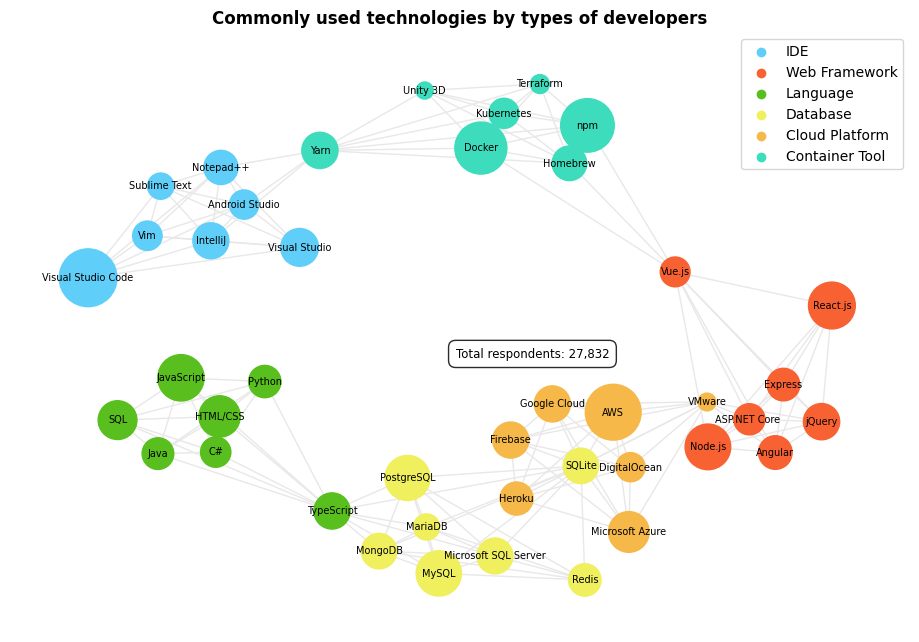

In [20]:
f3.get_networkx_graph(df = dev_graph_df,
                      col_list = dev_graph_df.columns,
                      separator = ';',
                      top_n = 7,
                      title = 'Commonly used technologies by types of developers',
                      edge_color = '#e9e7e7')

## DevType = Data

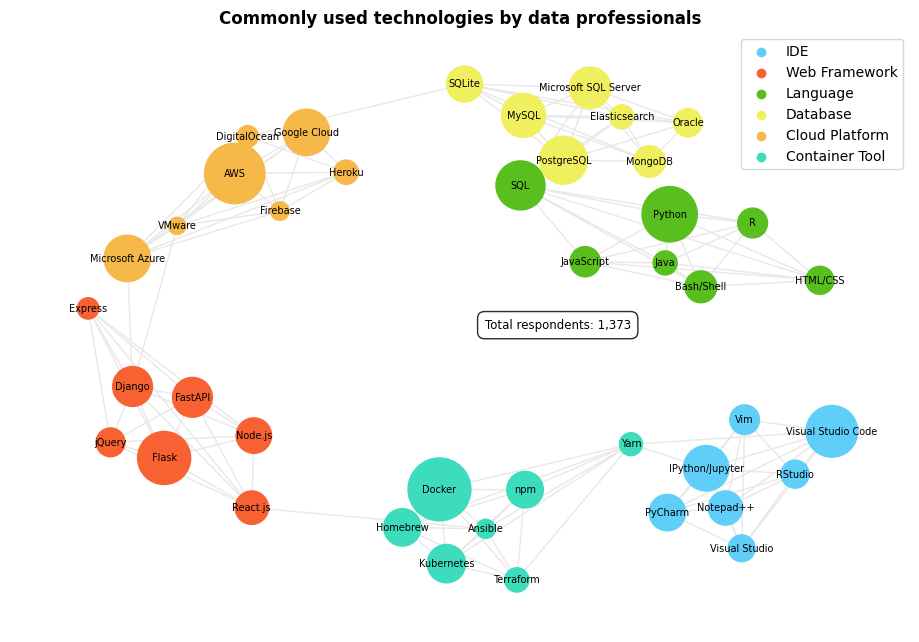

In [18]:
f3.get_networkx_graph(data_graph_df,
                      col_list = dev_graph_df.columns,
                      separator = ';',
                      top_n = 7,
                      title = 'Commonly used technologies by data professionals',
                      edge_color = '#e9e7e7')